# Code Plateau Automobile Company Project

## Problem Statement

A Chinese automobile company Geely Auto aspires to enter the Nigerian market by setting up its manufacturing unit and producing cars locally to compete with their Nigerian, US and European counterparts.
They have contacted you, a Data Scientist to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the Nigerian market, since those may be very different from the Chinese market. 
> The company wants to know:
 - Which variables are significant in predicting the price of a car
 - How well do those variables describe the price of a car
 
Based on various market surveys, you have gathered a large data set of different types of cars across the Nigerian market.

## Objective 

You are required to model the price of cars with the available independent variables. The management will use it to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

### Data Dictionary
 - Car_ID - Unique id of each observation (Interger)
 - Symboling - Its assigned insurance risk rating, A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe.(Categorical) 
 - carCompany - Name of car company (Categorical)
 - fueltype - Car fuel type i.e gas or diesel (Categorical)
 - aspiration - Aspiration used in a car (Categorical)
 - doornumber - Number of doors in a car (Categorical)
 - carbody - body of car (Categorical)
 - drivewheel - type of drive wheel (Categorical)
 - enginelocation	- Location of car engine (Categorical)
 - wheelbase - Weelbase of car (Numeric)	
 - carlength - Length of car (Numeric)
 - carwidth - Width of car (Numeric)
 - carheight - height of car (Numeric)
 - curbweight - The weight of a car without occupants or baggage. (Numeric)
 - enginetype - Type of engine. (Categorical
 - cylindernumber - cylinder placed in the car (Categorical)	
 - enginesize - Size of car (Numeric)
 - fuelsystem - Fuel system of car (Categorical)
 - boreratio - Boreratio of car (Numeric)		
 - stroke - Stroke or volume inside the engine (Numeric)	
 - compressionratio - compression ratio of car (Numeric)	
 - horsepower - Horsepower (Numeric)		
 - peakrpm - car peak rpm (Numeric) 
 - citympg	 - Mileage in city (Numeric)
 - highwaympg - Mileage on highway (Numeric)	
 - price(Dependent variable) - Price of car (Numeric)

### Importing the necessary libraries for data investigation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import GridSearchCV
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("CarPrice_data.csv")

In [3]:
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.680,9.00,111,5000,21,27,13495.000
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.680,9.00,111,5000,21,27,16500.000
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.470,9.00,154,5000,19,26,16500.000
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.400,10.00,102,5500,24,30,13950.000
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.400,8.00,115,5500,18,22,17450.000
5,6,2,audi fox,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.400,8.50,110,5500,19,25,15250.000
6,7,1,audi 100ls,gas,std,four,sedan,fwd,front,105.8,192.7,71.4,55.7,2844,ohc,five,136,mpfi,3.19,3.400,8.50,110,5500,19,25,17710.000
7,8,1,audi 5000,gas,std,four,wagon,fwd,front,105.8,192.7,71.4,55.7,2954,ohc,five,136,mpfi,3.19,3.400,8.50,110,5500,19,25,18920.000
8,9,1,audi 4000,gas,turbo,four,sedan,fwd,front,105.8,192.7,71.4,55.9,3086,ohc,five,131,mpfi,3.13,3.400,8.30,140,5500,17,20,23875.000
9,10,0,audi 5000s (diesel),gas,turbo,two,hatchback,4wd,front,99.5,178.2,67.9,52.0,3053,ohc,five,131,mpfi,3.13,3.400,7.00,160,5500,16,22,17859.167


In [4]:
df.shape

(205, 26)

In [5]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [7]:
df.nunique()

car_ID              205
symboling             6
CarName             147
fueltype              2
aspiration            2
doornumber            2
carbody               5
drivewheel            3
enginelocation        2
wheelbase            53
carlength            75
carwidth             44
carheight            49
curbweight          171
enginetype            7
cylindernumber        7
enginesize           44
fuelsystem            8
boreratio            38
stroke               37
compressionratio     32
horsepower           59
peakrpm              23
citympg              29
highwaympg           30
price               189
dtype: int64

### Step 2 : Data Cleaning and Preparation

In [8]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

<AxesSubplot:>

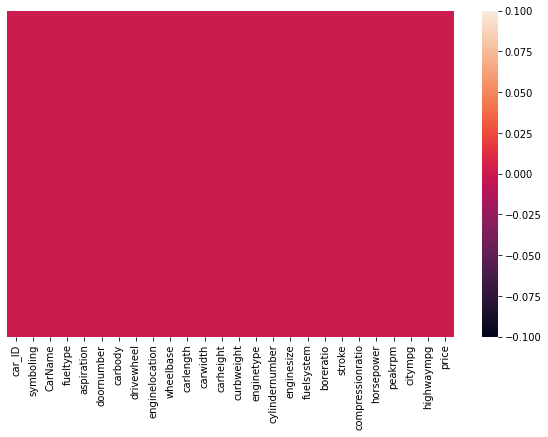

In [9]:
plt.figure(figsize=(10,6))
sns.heatmap(data=df.isna(),yticklabels=False)
#as you can see there is no null value

In [10]:
# investigating duplicate values in the dataset
df.duplicated().sum()

0

In [11]:
## Droping Car ID as its not important in the dataset
df = df.drop(['car_ID'], axis=1)

In [12]:
# dropping the car id variable in the dataset
df.describe(include = 'all')

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205,205,205,205,205,205,205,205.000000,205.000000,205.000000,205.000000,205.000000,205,205,205.000000,205,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
unique,NaN,147,2,2,2,5,3,2,NaN,NaN,NaN,NaN,NaN,7,7,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,toyota corona,gas,std,four,sedan,fwd,front,NaN,NaN,NaN,NaN,NaN,ohc,four,NaN,mpfi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,6,185,168,115,96,120,202,NaN,NaN,NaN,NaN,NaN,148,159,NaN,94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.834146,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.756585,174.049268,65.907805,53.724878,2555.565854,NaN,NaN,126.907317,NaN,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,1.245307,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.021776,12.337289,2.145204,2.443522,520.680204,NaN,NaN,41.642693,NaN,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,-2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.600000,141.100000,60.300000,47.800000,1488.000000,NaN,NaN,61.000000,NaN,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.500000,166.300000,64.100000,52.000000,2145.000000,NaN,NaN,97.000000,NaN,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.000000,173.200000,65.500000,54.100000,2414.000000,NaN,NaN,120.000000,NaN,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.400000,183.100000,66.900000,55.500000,2935.000000,NaN,NaN,141.000000,NaN,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000


In [13]:
# create dictionary of aggregations ie numeric value 
aggregations=(
    {
        'wheelbase':max, # minimum height of car in each group
        'carlength':max, # maximum height of car in each group
        'carwidth':max,
        'carheight':max,
        'price': 'mean', # average price of car in each group
    }
)
# implementing aggregations in groups of three
df.groupby(
 ["carbody","drivewheel", "enginetype"]
).agg(aggregations)

wheelbase  carlength  carwidth  carheight  \
carbody     drivewheel enginetype                                              
convertible fwd        ohc              94.5      159.3      64.2       55.6   
            rwd        dohc             88.6      168.8      64.1       48.8   
                       ohc              98.4      176.2      65.6       53.0   
                       ohcf             89.5      168.9      65.0       51.6   
                       ohcv             96.6      180.3      70.5       50.8   
hardtop     fwd        ohc              95.1      162.4      63.8       53.3   
            rwd        ohc             106.7      187.5      70.3       54.9   
                       ohcf             89.5      168.9      65.0       51.6   
                       ohcv            112.0      199.2      72.0       55.4   
hatchback   4wd        ohc              99.5      178.2      67.9       52.0   
                       ohcf             93.3      157.3      63.8       55.7   
            fwd        dohc             99.1      186.6      66.5       56.1   
                       l                88.4      141.1      60.3       53.2   
                       ohc             102.4      186.6      66.6       56.1   
                       ohcf             93.7      157.9      63.6       53.7   
            rwd        dohc            102.9      183.5      67.7       52.6   
                       dohcv            98.4      175.7      72.3       50.5   
                       ohc             102.7      178.4      68.3       54.8   
                       ohcv             99.2      178.5      67.9       52.4   
                       rotor            95.3      169.0      65.7       49.6   
sedan       4wd        ohc              99.4      176.6      66.4       54.3   
                       ohcf             97.0      172.0      65.4       54.3   
            fwd        dohc             99.1      186.6      66.5       56.1   
                       ohc             105.8      192.7      71.4       56.1   
                       ohcf             97.2      172.0      65.4       52.5   
                       ohcv            100.4      184.6      66.5       55.1   
            rwd        dohc            113.0      199.6      69.6       54.1   
                       l               108.0      186.7      68.4       56.7   
                       ohc             115.6      202.6      71.7       56.5   
                       ohcv            120.9      208.1      71.7       56.7   
wagon       4wd        ohc              95.7      169.7      63.6       59.1   
                       ohcf             96.9      173.6      65.4       54.9   
            fwd        ohc             105.8      192.7      71.4       59.8   
                       ohcf             97.0      173.5      65.4       53.0   
                       ohcv            100.4      184.6      66.5       56.1   
            rwd        dohc            104.5      187.8      66.5       54.1   
                       l               114.2      198.9      68.4       58.7   
                       ohc             110.0      190.9      70.3       58.7   

                                          price  
carbody     drivewheel enginetype                
convertible fwd        ohc         11595.000000  
            rwd        dohc        14997.500000  
                       ohc         17669.000000  
                       ohcf        37028.000000  
                       ohcv        35056.000000  
hardtop     fwd        ohc          8249.000000  
            rwd        ohc         14365.750000  
                       ohcf        33278.000000  
                       ohcv        45400.000000  
hatchback   4wd        ohc         17859.167000  
                       ohcf         7603.000000  
            fwd        dohc        18150.000000  
                       l            5151.000000  
                       ohc          8354.466667  
                       ohcf       

In [14]:
#Checking for duplicates
df.loc[df.duplicated()]

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price


In [15]:
#data cleaning and prepration
df['CarName'] = df['CarName'].apply(lambda x: x.split(' ')[0])

In [16]:
df.head()
#now we can see that we have properly data in CarNmae column

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [17]:
df['CarName'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [18]:
#as you can see here is some spelling mistakes we need to correct it 
def replace_name(a,b):
    df['CarName'].replace(a,b,inplace=True)
    
replace_name('maxda','mazda')
replace_name('toyouta','toyota')
replace_name('porcshce','porsche')
replace_name('vokswagen','volkswagen')
replace_name('vw','volkswagen')

In [19]:
#now checking after replcement
df['CarName'].nunique()

23

In [20]:
#checking the duplicated entry
duplicate_row = df[df.duplicated()]
print(duplicate_row)
#there is no duplicate row in the dataset

Empty DataFrame
Columns: [symboling, CarName, fueltype, aspiration, doornumber, carbody, drivewheel, enginelocation, wheelbase, carlength, carwidth, carheight, curbweight, enginetype, cylindernumber, enginesize, fuelsystem, boreratio, stroke, compressionratio, horsepower, peakrpm, citympg, highwaympg, price]
Index: []


In [21]:
df.columns

Index(['symboling', 'CarName', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

## now visulizing the dataset

In [22]:
df.head(2)

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0


<AxesSubplot:title={'center':'Price  of the Car'}, xlabel='price'>

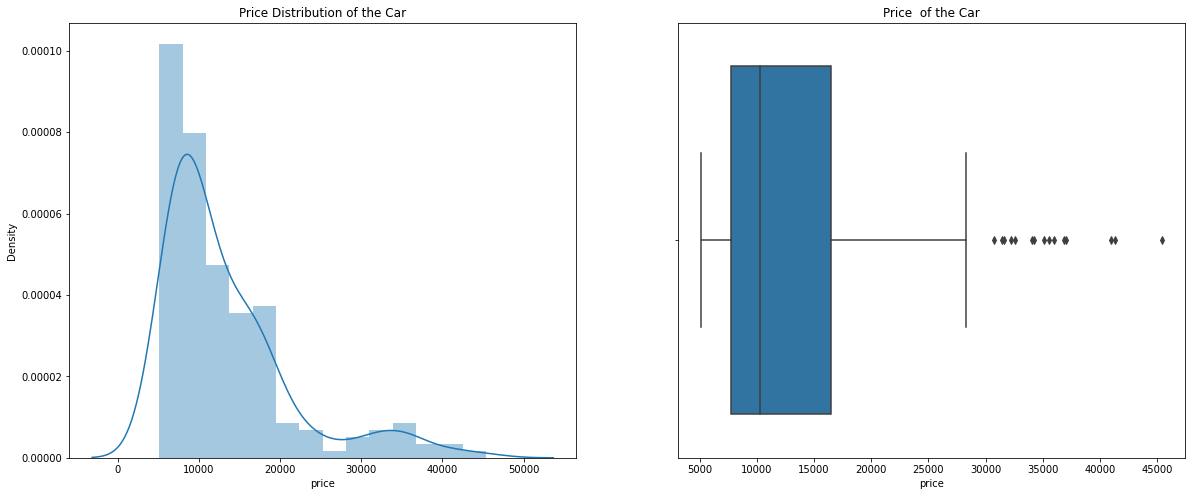

In [23]:
#checking the distribution of the car_price
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.title('Price Distribution of the Car')
sns.distplot(df['price'])
#plt.show()
plt.subplot(1,2,2)
plt.title('Price  of the Car')
sns.boxplot(df['price'],orient='v')

In [24]:
print(df['price'].describe(percentiles=[0.25,0.50,0.65,0.75,0.85,0.90,1]))

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
65%      13499.000000
75%      16503.000000
85%      18500.000000
90%      22563.000000
100%     45400.000000
max      45400.000000
Name: price, dtype: float64


1. The plot seemed to be right-skewed, meaning that the most prices in the dataset are low(Below 15,000).
2. There is a significant difference between the mean and the median of the price distribution.
3. The data points are far spread out from the mean, which indicates a high variance in the car prices.(85% of the prices are below 18,500, whereas the remaining 15% are between 18,500 and 45,400.)

Text(0.5, 1.0, 'Wheelbase Info')

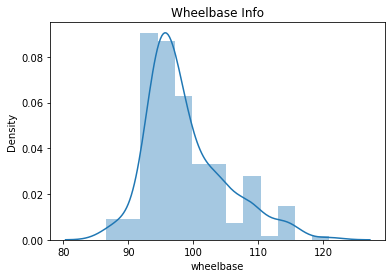

In [25]:
sns.distplot(df['wheelbase'])
plt.title('Wheelbase Info')

Text(0.5, 1.0, 'horse power details')

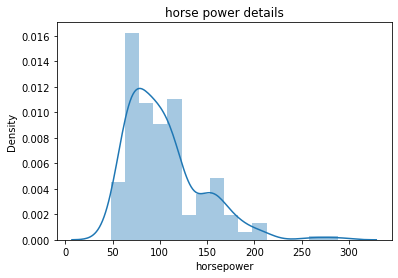

In [26]:
sns.distplot(df['horsepower'])
plt.title('horse power details')

## Now plotting categorical variables

Frequecney of car type 
 toyota        15.609756
mazda          8.292683
nissan         8.292683
mitsubishi     6.341463
honda          6.341463
Name: CarName, dtype: float64
*********************************************
fuel Type counts 
 gas       90.243902
diesel     9.756098
Name: fueltype, dtype: float64
*********************************************
type of drive wheel count 
 fwd    58.536585
rwd    37.073171
4wd     4.390244
Name: drivewheel, dtype: float64
*********************************************
car type count
 sedan          46.829268
hatchback      34.146341
wagon          12.195122
hardtop         3.902439
convertible     2.926829
Name: carbody, dtype: float64
*********************************************


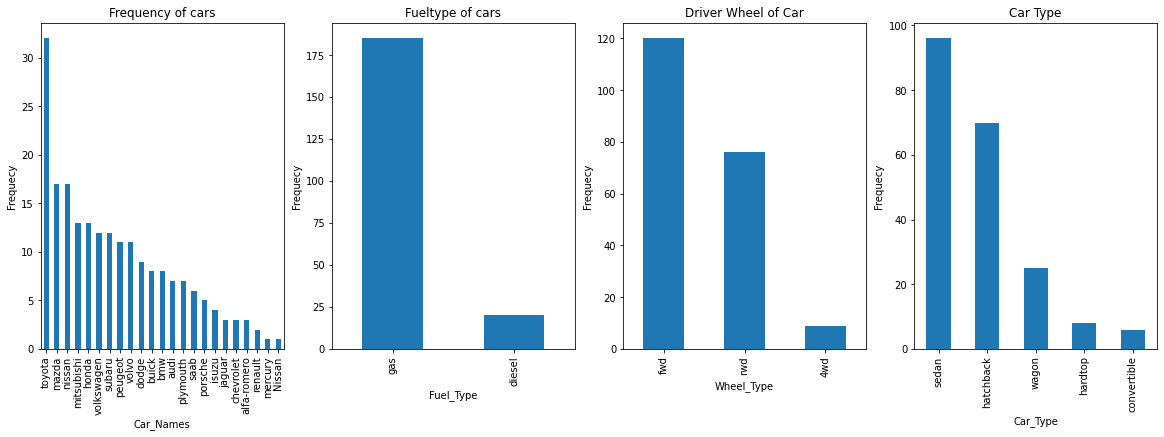

In [27]:
plt.figure(figsize=(20,6))
plt.subplot(1,4,1)
plt1 = df['CarName'].value_counts().plot(kind='bar')
print("Frequecney of car type \n",df['CarName'].value_counts(normalize=True).head()*100)
print("*********************************************")
plt.title('Frequency of cars')

plt1.set(xlabel='Car_Names',ylabel='Frequecy')
plt.subplot(1,4,2)
plt1 = df['fueltype'].value_counts().plot(kind='bar')
plt1.set(xlabel='Fuel_Type',ylabel='Frequecy')
print("fuel Type counts \n",df['fueltype'].value_counts(normalize=True)*100)
print("*********************************************")
plt.title('Fueltype of cars')

plt.subplot(1,4,3)
plt1 = df['drivewheel'].value_counts().plot(kind='bar')
plt1.set(xlabel='Wheel_Type',ylabel='Frequecy')
print("type of drive wheel count \n",df['drivewheel'].value_counts(normalize=True)*100)
print("*********************************************")
plt.title('Driver Wheel of Car')

plt.subplot(1,4,4)
plt1 = df['carbody'].value_counts().plot(kind='bar')
plt1.set(xlabel='Car_Type',ylabel='Frequecy')
print("car type count\n",df['carbody'].value_counts(normalize=True)*100)
print("*********************************************")
plt.title('Car Type')
plt.show()

1. `Toyota` seemed to be favored car company.
2. Number of `gas` fueled cars are more than `diesel`.
3. `sedan` is the top car type prefered..
4. 'fwd' is the prefered wheel type

Now plotting symboiling vs price


Text(0.5, 1.0, 'Symboiling VS price')

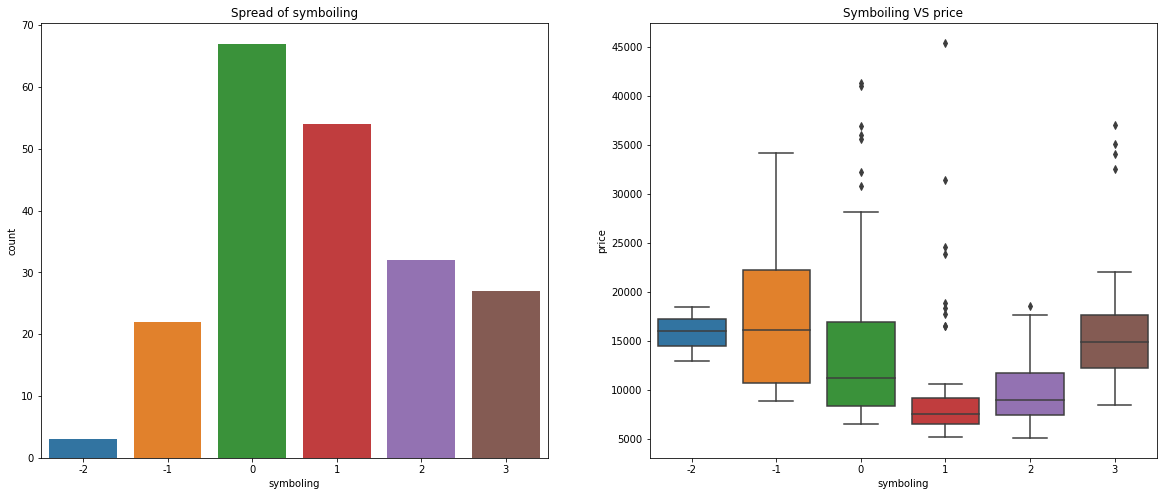

In [28]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
sns.countplot(x='symboling',data=df)
plt.title('Spread of symboiling')
print("Now plotting symboiling vs price")
plt.subplot(1,2,2)
sns.boxplot(x='symboling',y='price',data=df)
plt.title('Symboiling VS price')

1. It seems that the symboling with `0` and `1` values have high number of rows (i.e. They are most sold.)
2. The cars with `-1` symboling seems to be high priced (as it makes sense too, insurance risk rating -1 is quite good). But it seems that symboling with `3` value has the price range similar to `-2` value. There is a dip in price at symboling `1`.

In [29]:
df.head(2)

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0


In [30]:
df['enginetype'].unique()

array(['dohc', 'ohcv', 'ohc', 'l', 'rotor', 'ohcf', 'dohcv'], dtype=object)

<AxesSubplot:>

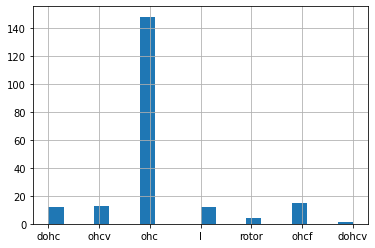

In [31]:
df['enginetype'].hist(bins=20)

<AxesSubplot:xlabel='enginetype', ylabel='price'>

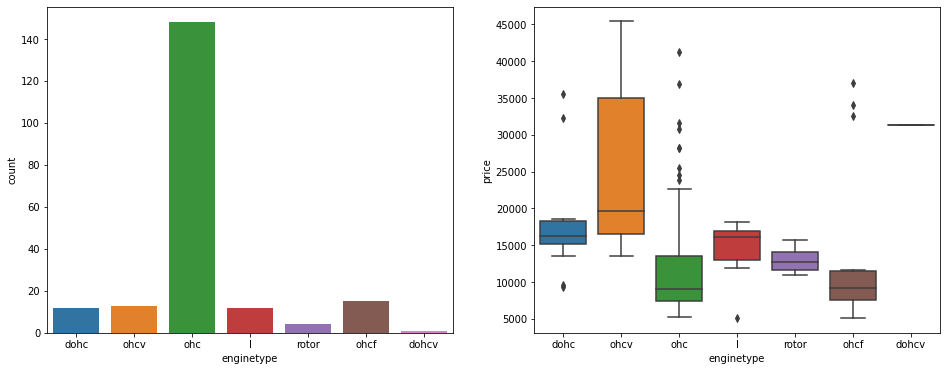

In [32]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
sns.countplot(x='enginetype',data=df)
plt.subplot(1,2,2)
sns.boxplot(x='enginetype',y='price',data=df)

1. `ohc` Engine type seems to be most favored type.
2. `ohcv` has the highest price range (While `dohcv` has only one row), `ohc` and `ohcf` have the low price range.

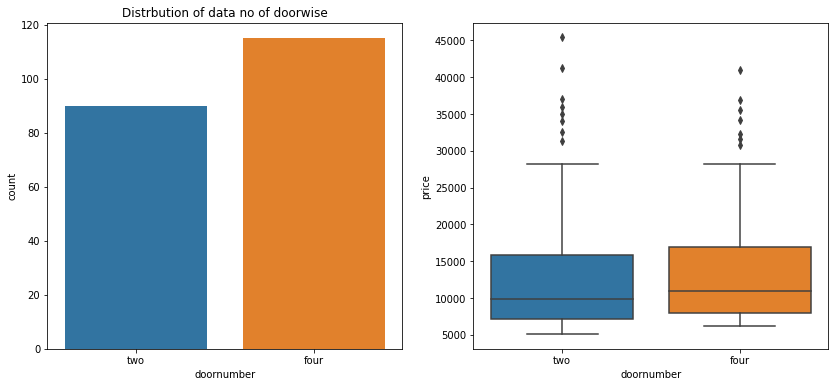

In [33]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.countplot(x='doornumber',data=df)
plt.title("Distrbution of data no of doorwise")
plt.subplot(1,2,2)
sns.boxplot(x='doornumber',y='price',data=df)
plt.show()

1. `doornumber` variable is not affacting the price much. There is no sugnificant difference between the categories in it, but cars with four doors are most prefered.

In [34]:
df.head(3)

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0


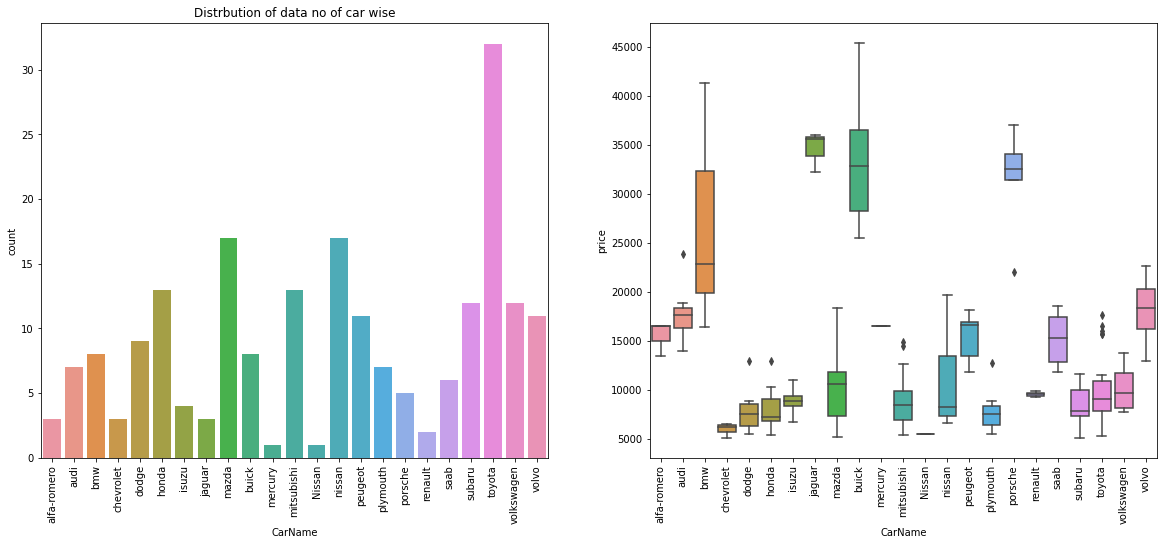

In [35]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
c = sns.countplot(x='CarName',data=df)
c.set_xticklabels(c.get_xticklabels(), rotation=90)
plt.title("Distrbution of data no of car wise")
plt.subplot(1,2,2)
b = sns.boxplot(x='CarName',y='price',data=df)
b.set_xticklabels(b.get_xticklabels(),rotation=90)
plt.show()

1. `Toyota` seemed to be favored car company.

2. `Jaguar` and `Buick` seem to have highest average price.

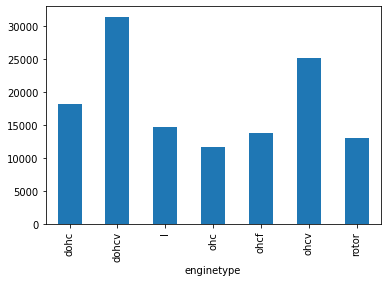

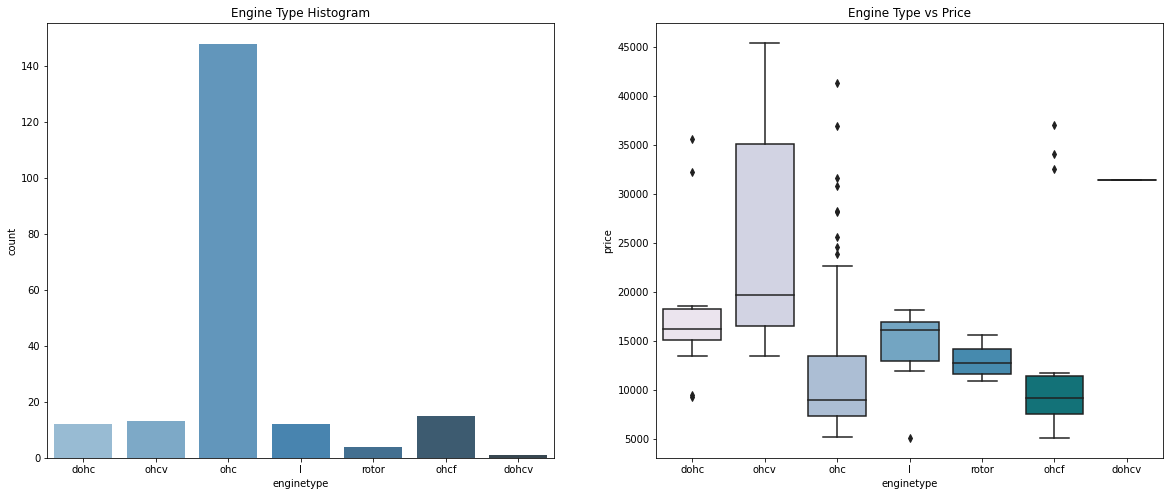

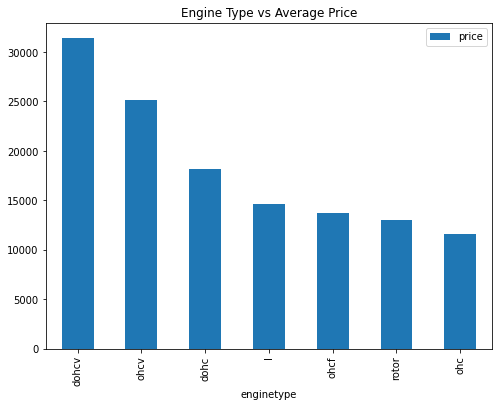

In [36]:
df.groupby('enginetype').mean()['price'].plot(kind='bar')

plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Engine Type Histogram')
sns.countplot(df.enginetype, palette=("Blues_d"))

plt.subplot(1,2,2)
plt.title('Engine Type vs Price')
sns.boxplot(x=df.enginetype, y=df.price, palette=("PuBuGn"))

plt.show()

df1 = pd.DataFrame(df.groupby(['enginetype'])['price'].mean().sort_values(ascending = False))
df1.plot.bar(figsize=(8,6))
plt.title('Engine Type vs Average Price')
plt.show()

1. `ohc` Engine type seems to be most favored type.
2. `ohcv` has the highest price range (While `dohcv` has only one row), `ohc` and `ohcf` have the low price range.

<Figure size 1152x720 with 0 Axes>

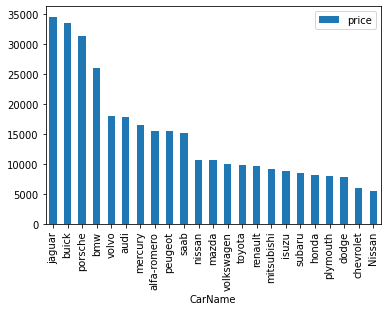

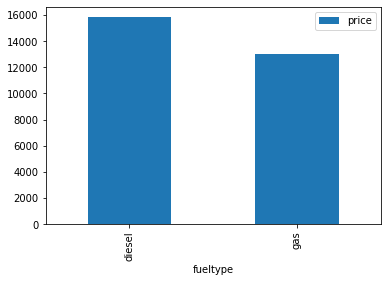

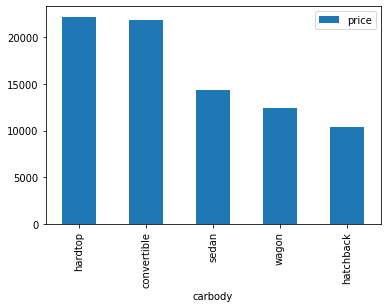

In [37]:
plt.figure(figsize=(16,10))
df1=pd.DataFrame(df.groupby('CarName')['price'].mean().sort_values(ascending=False))
df1.plot(kind='bar')
df1=pd.DataFrame(df.groupby('fueltype')['price'].mean().sort_values(ascending=False))
df1.plot(kind='bar')
df1=pd.DataFrame(df.groupby('carbody')['price'].mean().sort_values(ascending=False))
df1.plot(kind='bar')
plt.show()

1. `Jaguar` and `Buick` seem to have highest average price.
2. `diesel` has higher average price than  gas.
3. `hardtop` and `convertible` have higher average price.

<AxesSubplot:xlabel='aspiration', ylabel='price'>

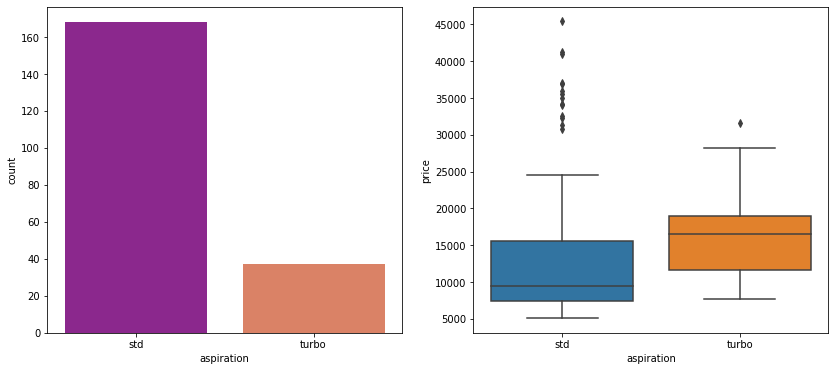

In [38]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.countplot(x='aspiration',data=df,palette=('plasma'))
plt.subplot(1,2,2)
sns.boxplot(x='aspiration',y='price',data=df)

1. It seems aspiration with `turbo` have higher price range than the `std`(though it has some high values outside the whiskers.)

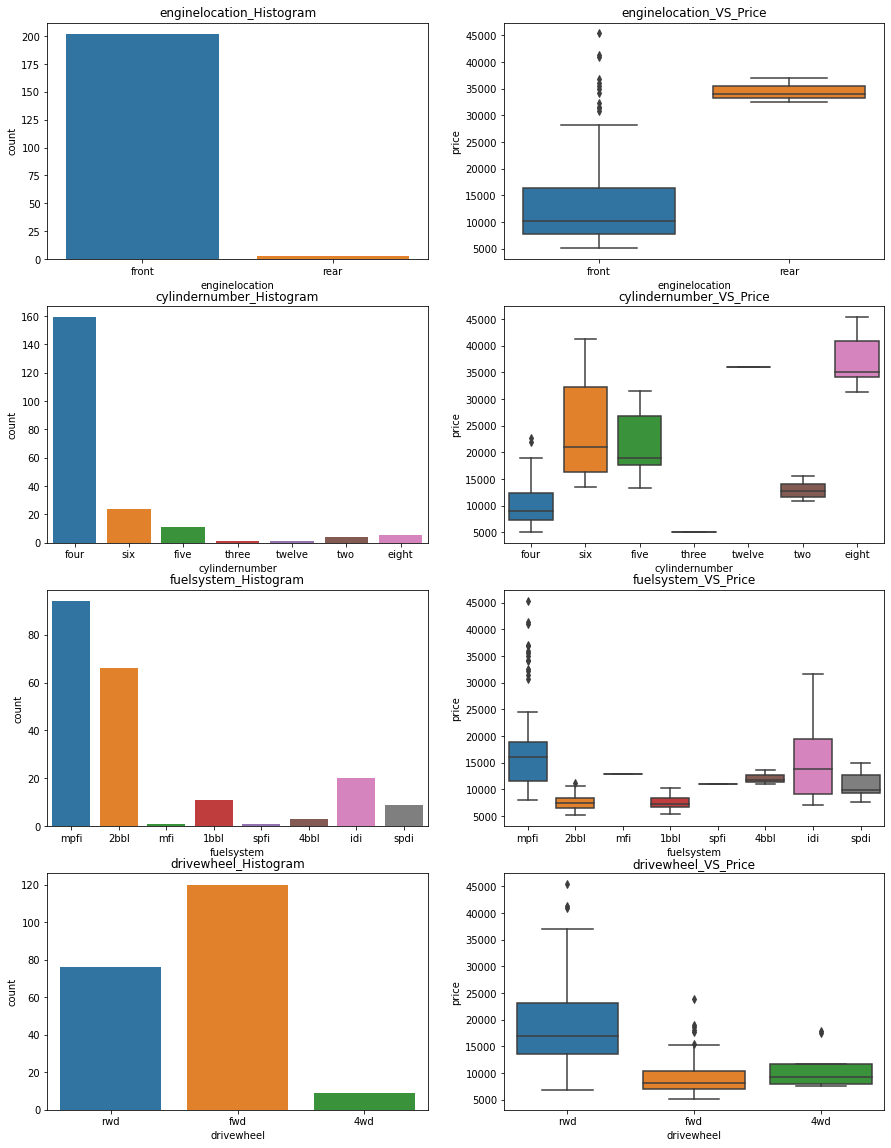

In [39]:
#now building a function to plot reaming categorical variables
def plot_cats(var,fig):
    plt.subplot(4,2,fig)
    sns.countplot(df[var])
    plt.title(var+'_'+'Histogram')
    plt.subplot(4,2,(fig+1))
    sns.boxplot(x=df[var],y=df['price'])
    plt.title(var+'_'+'VS'+'_'+'Price')
    #plt.show()
plt.figure(figsize=(15,20))
plot_cats('enginelocation', 1)
plot_cats('cylindernumber', 3)
plot_cats('fuelsystem', 5)
plot_cats('drivewheel', 7)

1. Very few datapoints for `enginelocation` categories to make an inference.
2. Most common number of cylinders are `four`, `six` and `five`. Though `eight` cylinders have the highest price range.
3. `mpfi` and `2bbl` are most common type of fuel systems. `mpfi` and `idi` having the highest price range. But there are few data for other categories to derive any meaningful inference
4. A very significant difference in drivewheel category. Most high ranged cars seem to prefer `rwd` drivewheel.

### now plotting the numerical variables

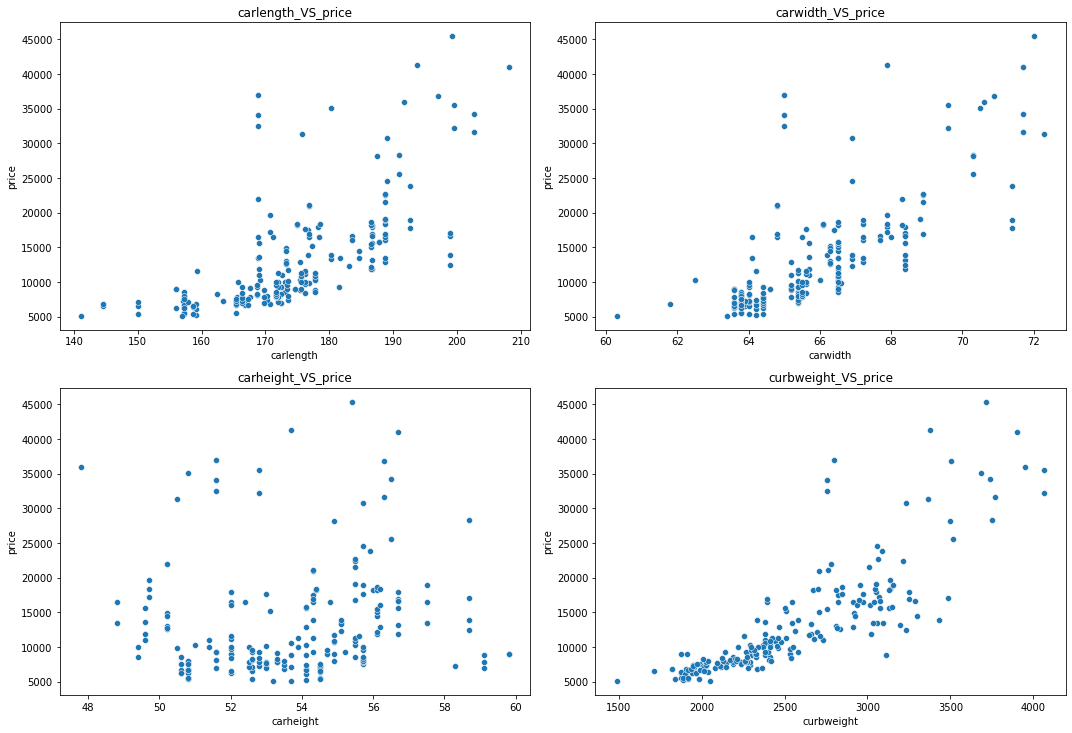

In [40]:
def scatter_plot(var,fig):
    plt.subplot(4,2,fig)
    sns.scatterplot(x=var,y='price',data=df)
    plt.title(var+'_'+'VS'+'_'+'price')
plt.figure(figsize=(15,20))
scatter_plot('carlength', 1)
scatter_plot('carwidth', 2)
scatter_plot('carheight', 3)
scatter_plot('curbweight', 4)

plt.tight_layout()

1. `carwidth`, `carlength` and `curbweight` seems to have a poitive correlation with `price`. 
2. `carheight` doesn't show any significant trend with price.

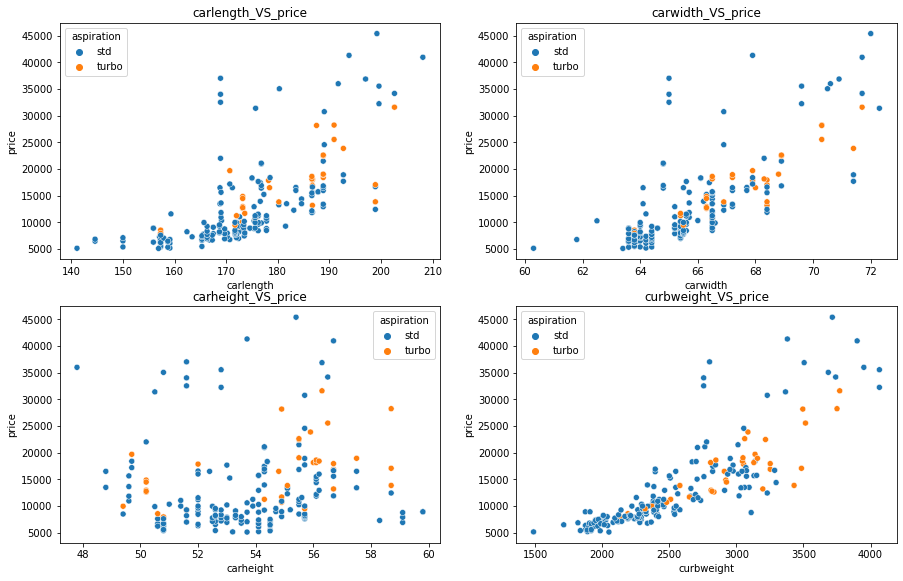

In [41]:
def scatter_plot(var,fig,h):
    plt.subplot(4,2,fig)
    sns.scatterplot(x=var,y='price',data=df,hue=h)
    plt.title(var+'_'+'VS'+'_'+'price')
plt.figure(figsize=(15,20))
scatter_plot('carlength', 1,'aspiration')
scatter_plot('carwidth', 2,'aspiration')
scatter_plot('carheight', 3,'aspiration')
scatter_plot('curbweight', 4,'aspiration')

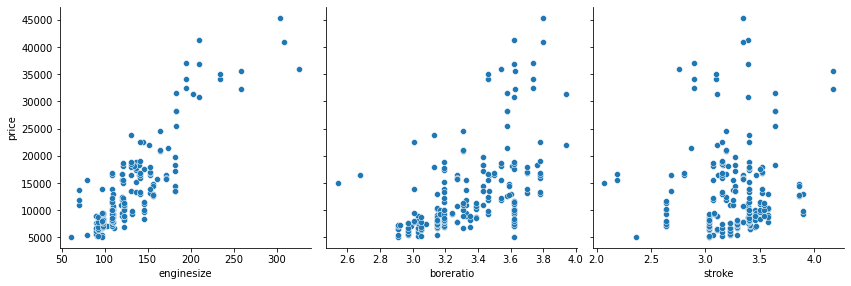

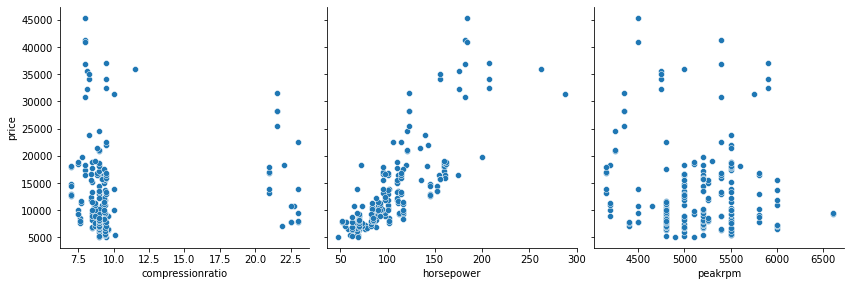

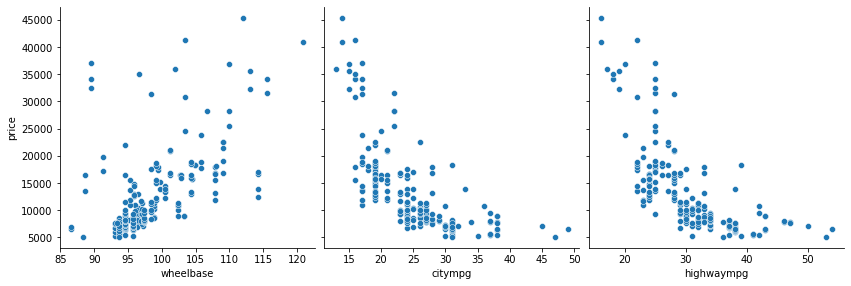

In [42]:
def pp(x,y,z):
    sns.pairplot(df, x_vars=[x,y,z], y_vars='price',size=4, aspect=1,kind='scatter')
    plt.show()

pp('enginesize', 'boreratio', 'stroke')
pp('compressionratio', 'horsepower', 'peakrpm')
pp('wheelbase', 'citympg', 'highwaympg')

1. `enginesize`, `boreratio`, `horsepower`, `wheelbase` - seem to have a significant positive correlation with price.
2. `citympg`, `highwaympg` - seem to have a significant negative correlation with price.

In [43]:
###driving the new feature based on perivous
df['fueleconomey'] = (df['citympg']*0.55) + (df['highwaympg']*0.45)

In [44]:
df['fueleconomey'].head()

0    23.70
1    23.70
2    22.15
3    26.70
4    19.80
Name: fueleconomey, dtype: float64

In [45]:
#binning the companies based on the average price of each company
df['price'] = df['price'].astype(int)
temp = df.copy()
table = temp.groupby(['CarName']).mean()['price'].sort_values(ascending=False)
table
temp = temp.merge(table.reset_index(),how='left',on='CarName')
cars_bin=['Budget','Medium','Highend']
bins = [0,10000,20000,40000]
df['carsrange'] = pd.cut(temp['price_y'],bins,right=False,labels=cars_bin)
df.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,fueleconomey,carsrange
0,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495,23.70,Medium
1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500,23.70,Medium
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500,22.15,Medium
3,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950,26.70,Medium
4,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450,19.80,Medium


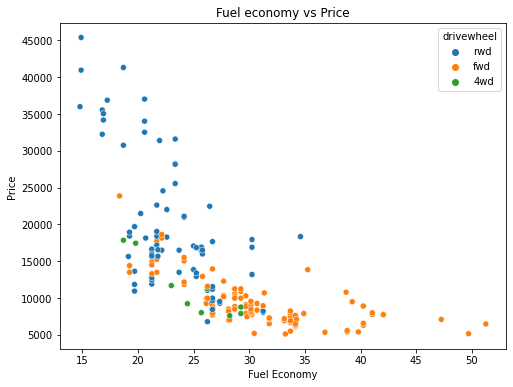

<Figure size 432x288 with 0 Axes>

In [46]:
#now perforrming bivariate analysis
plt.figure(figsize=(8,6))

plt.title('Fuel economy vs Price')
sns.scatterplot(x=df['fueleconomey'],y=df['price'],hue=df['drivewheel'])
plt.xlabel('Fuel Economy')
plt.ylabel('Price')

plt.show()
plt.tight_layout()

1. `fueleconomy` has an obvios `negative correlation` with price and is significant.

<Figure size 1800x432 with 0 Axes>

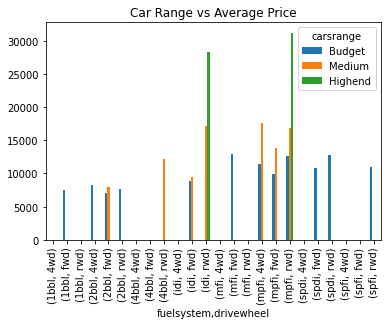

In [47]:
plt.figure(figsize=(25, 6))

df1 = pd.DataFrame(df.groupby(['fuelsystem','drivewheel','carsrange'])['price'].mean().unstack(fill_value=0))
df1
df1.plot.bar()
plt.title('Car Range vs Average Price')
plt.show()

1. High ranged cars prefer `rwd` drivewheel with `idi` or `mpfi` fuelsystem.

In [48]:
correlation = df.corr(method='pearson') # using pearson correlation
correlation

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,fueleconomey
symboling,1.000000,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.130051,-0.008735,-0.178515,0.070873,0.273606,-0.035823,0.034606,-0.079978,-0.003257
wheelbase,-0.531954,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816,-0.508136
carlength,-0.357612,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682921,-0.691472
carwidth,-0.232919,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218,0.759325,-0.663419
carheight,-0.541038,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171071,-0.055307,0.261214,-0.108802,-0.320411,-0.048640,-0.107358,0.119337,-0.076356
curbweight,-0.227691,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648480,0.168790,0.151362,0.750739,-0.266243,-0.757414,-0.797465,0.835305,-0.781535
enginesize,-0.105790,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583774,0.203129,0.028971,0.809769,-0.244660,-0.653658,-0.677470,0.874145,-0.669464
boreratio,-0.130051,0.488750,0.606454,0.559150,0.171071,0.648480,0.583774,1.000000,-0.055909,0.005197,0.573677,-0.254976,-0.584532,-0.587012,0.553174,-0.589898
stroke,-0.008735,0.160959,0.129533,0.182942,-0.055307,0.168790,0.203129,-0.055909,1.000000,0.186110,0.080940,-0.067964,-0.042145,-0.043931,0.079443,-0.043281
compressionratio,-0.178515,0.249786,0.158414,0.181129,0.261214,0.151362,0.028971,0.005197,0.186110,1.000000,-0.204326,-0.435741,0.324701,0.265201,0.067984,0.299310


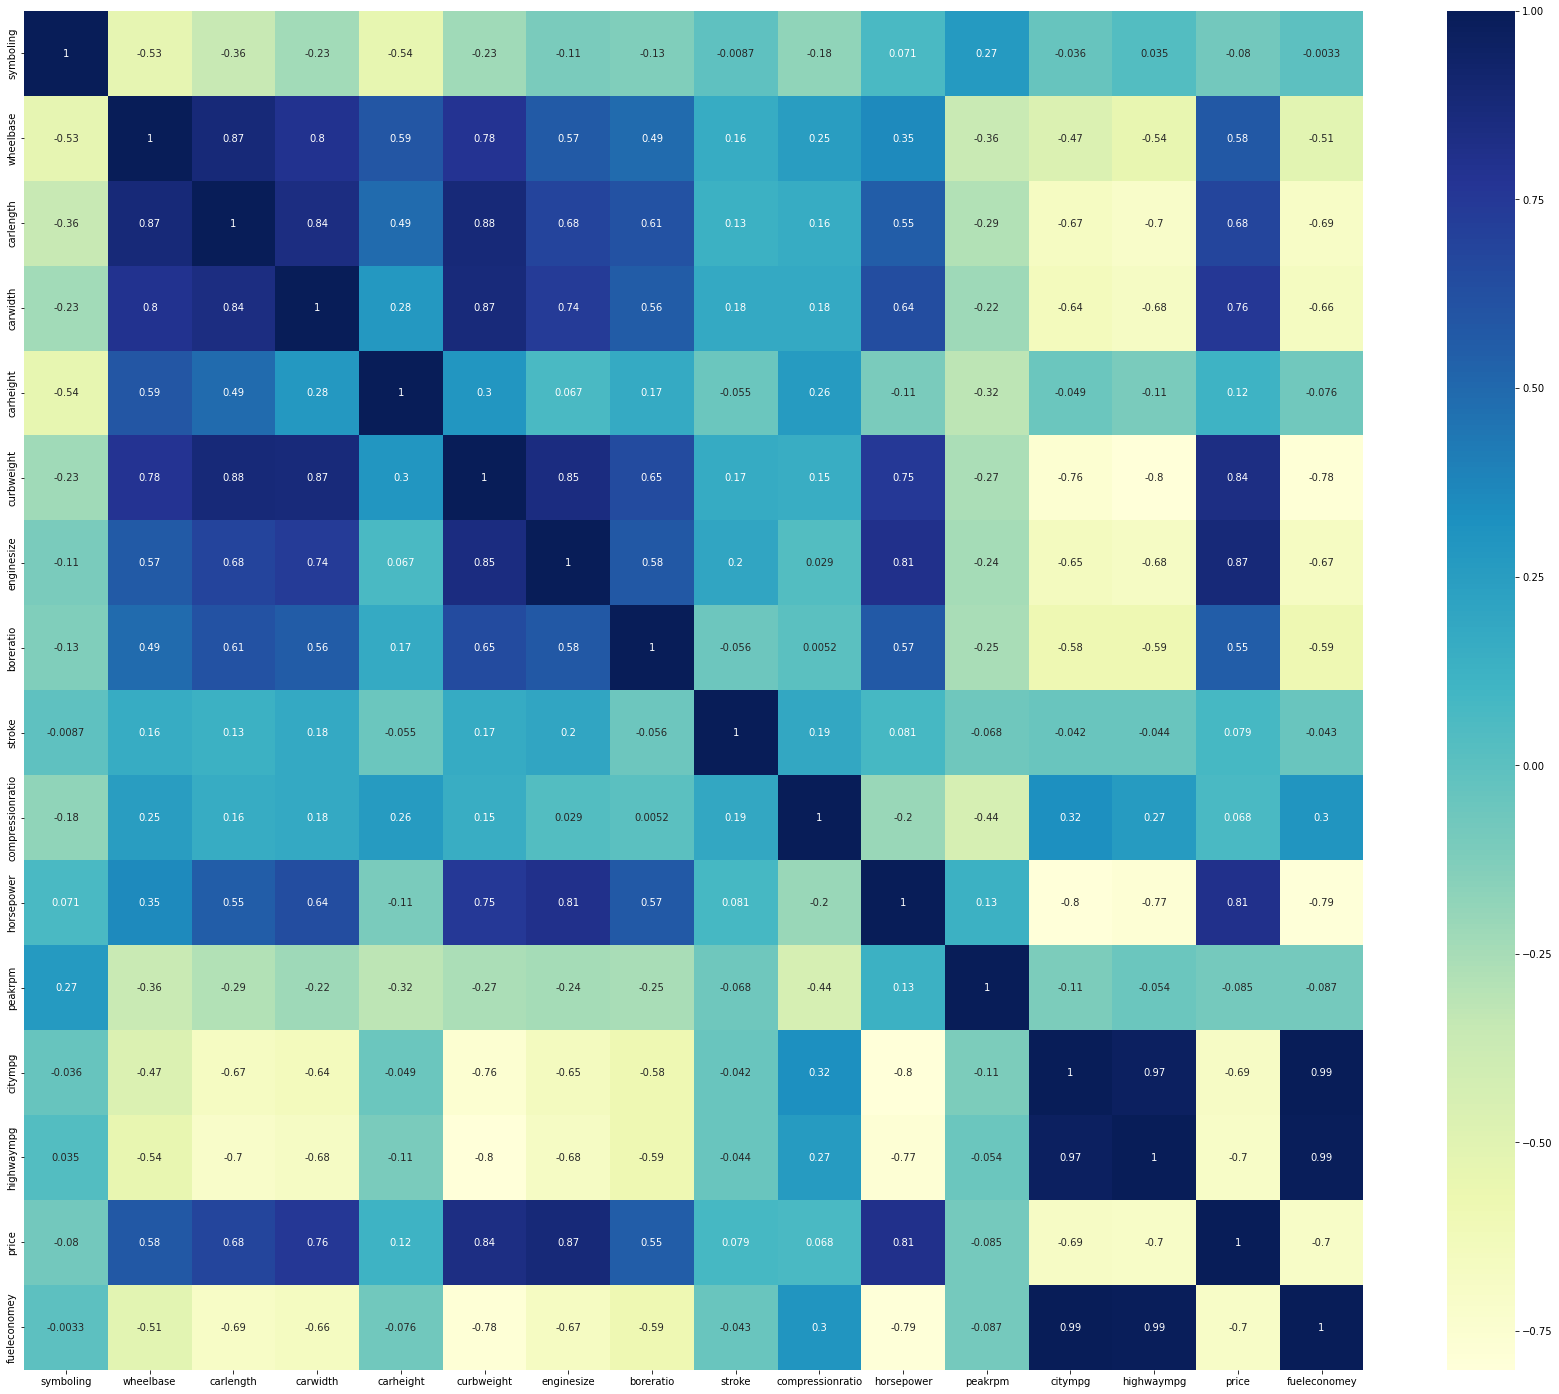

In [49]:
#Correlation using heatmap
plt.figure(figsize = (30, 25))
sns.heatmap(df.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [50]:
df['CarName'].astype('category').value_counts().sum()

205

## 3. Data Preparation 


#### Data Preparation

Let's now prepare the data and build the model.

In [51]:
# split into X and y
X = df.loc[:, ['symboling', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'CarName']]

y = df['price']


In [52]:
# creating dummy variables for categorical variables

# subset all categorical variables
df_categorical = X.select_dtypes(include=['object'])
df_categorical.head()


,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem,CarName
0,gas,std,two,convertible,rwd,front,dohc,four,mpfi,alfa-romero
1,gas,std,two,convertible,rwd,front,dohc,four,mpfi,alfa-romero
2,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi,alfa-romero
3,gas,std,four,sedan,fwd,front,ohc,four,mpfi,audi
4,gas,std,four,sedan,4wd,front,ohc,five,mpfi,audi


In [53]:
# convert into dummies
df_dummies = pd.get_dummies(df_categorical, drop_first=True)
df_dummies.head()

,fueltype_gas,aspiration_turbo,doornumber_two,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,CarName_alfa-romero,CarName_audi,CarName_bmw,CarName_buick,CarName_chevrolet,CarName_dodge,CarName_honda,CarName_isuzu,CarName_jaguar,CarName_mazda,CarName_mercury,CarName_mitsubishi,CarName_nissan,CarName_peugeot,CarName_plymouth,CarName_porsche,CarName_renault,CarName_saab,CarName_subaru,CarName_toyota,CarName_volkswagen,CarName_volvo
0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [54]:
# drop categorical variables 
X = X.drop(list(df_categorical.columns), axis=1)

In [55]:
# concat dummy variables with X
X = pd.concat([X, df_dummies], axis=1)

In [56]:
# scaling the features
from sklearn.preprocessing import scale

# storing column names in cols, since column names are (annoyingly) lost after 
# scaling (the df is converted to a numpy array)
cols = X.columns
X = pd.DataFrame(scale(X))
X.columns = cols
X.columns

Index(['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'fueltype_gas',
       'aspiration_turbo', 'doornumber_two', 'carbody_hardtop',
       'carbody_hatchback', 'carbody_sedan', 'carbody_wagon', 'drivewheel_fwd',
       'drivewheel_rwd', 'enginelocation_rear', 'enginetype_dohcv',
       'enginetype_l', 'enginetype_ohc', 'enginetype_ohcf', 'enginetype_ohcv',
       'enginetype_rotor', 'cylindernumber_five', 'cylindernumber_four',
       'cylindernumber_six', 'cylindernumber_three', 'cylindernumber_twelve',
       'cylindernumber_two', 'fuelsystem_2bbl', 'fuelsystem_4bbl',
       'fuelsystem_idi', 'fuelsystem_mfi', 'fuelsystem_mpfi',
       'fuelsystem_spdi', 'fuelsystem_spfi', 'CarName_alfa-romero',
       'CarName_audi', 'CarName_bmw', 'CarName_buick', 'CarName_chevrolet',
       'CarName_dodge', 'CarName_honda', 'CarName_isuzu', 'CarN

In [57]:
# split into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

## 3. Model Building and Evaluation

## Ridge and Lasso Regression

Let's now try predicting car prices, a dataset used in simple linear regression, to perform ridge and lasso regression.

## Ridge Regression

In [58]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [59]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=200]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.218325,0.421174,0.005595,0.002329,0.0001,{'alpha': 0.0001},-2564.020188,-1416.455348,-1262.825681,-4121.061782,-2175.666060,-2308.005812,1025.426044,26,-714.630461,-819.025826,-888.303704,-899.949376,-810.828322,-826.547538,66.378846
1,0.003797,0.000978,0.003596,0.001021,0.001,{'alpha': 0.001},-2561.107057,-1415.000190,-1262.993983,-4102.103218,-2167.728143,-2301.786518,1019.003330,25,-714.903807,-818.903793,-887.560860,-899.459077,-810.555922,-826.276692,66.055783
2,0.003397,0.000800,0.002198,0.000400,0.01,{'alpha': 0.01},-2535.385696,-1401.342859,-1264.217343,-3929.325686,-2097.534934,-2245.561304,960.907200,24,-717.529787,-817.736883,-880.717548,-895.157701,-808.132119,-823.854808,63.098520
3,0.003597,0.000800,0.002197,0.000398,0.05,{'alpha': 0.05},-2479.316685,-1375.168788,-1272.761796,-3433.309409,-1939.714977,-2100.054331,794.605529,23,-727.476285,-816.501653,-865.836107,-882.845277,-806.098260,-819.751517,54.435840
4,0.003397,0.000799,0.002797,0.000979,0.1,{'alpha': 0.1},-2448.505321,-1371.062719,-1294.255837,-3088.064762,-1848.733384,-2010.124405,678.387492,22,-734.522725,-817.983984,-855.516979,-876.091330,-805.774154,-817.977834,48.785348


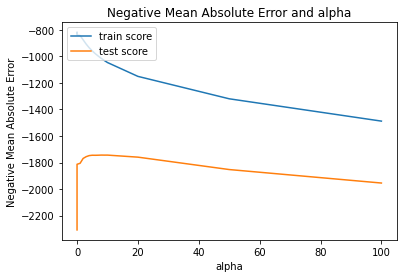

In [60]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [61]:
alpha = 15
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([ 1.64085863e+02,  4.99140233e+02,  8.88515803e+01,  1.40343397e+03,
       -3.19285822e+02,  1.18908114e+03,  1.35253851e+03,  3.87822797e+01,
       -2.70718646e+02, -1.10934412e+01,  9.34224226e+02,  3.45089831e+02,
       -1.22840034e+01, -1.13838571e+02, -2.17607078e+02,  4.55118127e+02,
       -2.08880397e+00, -1.64723220e+01, -4.78184510e+02, -2.55588508e+02,
       -1.93366889e+02, -2.31805576e+02,  1.73621805e+02,  9.56999977e+02,
       -4.48085115e+01, -1.94239787e+02,  4.02147348e+02,  9.41264130e+01,
       -4.13612474e+01,  1.20278662e+02, -4.73465452e+02, -6.45885185e+02,
       -9.29534376e+01,  2.86889848e+02, -1.89595212e+02,  1.20278662e+02,
        1.83254647e+01, -1.78201871e+02,  2.17607078e+02, -2.14074595e-29,
       -3.24376110e+01, -1.28325131e+02, -2.09128824e-29,  2.28193998e+02,
        3.13893944e+02,  1.49321610e+03,  1.14455231e+03, -6.65022418e+01,
       -2.77771815e+02, -1.86796635e+02,  4.93712562e+01,  8.18972969e+02,
       -1.36440251e+02, -

## Lasso

In [62]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [63]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.063784,0.095600,0.001999,3.234067e-07,0.0001,{'alpha': 0.0001},-2207.701047,-1457.269791,-1272.815105,-3509.899062,-1648.634677,-2019.263936,808.441828,15,-723.109478,-817.021941,-877.140561,-894.059722,-807.140039,-823.694348,60.404745
1,0.015385,0.000799,0.002198,3.996134e-04,0.001,{'alpha': 0.001},-2208.497673,-1457.149517,-1272.830309,-3509.425114,-1648.560265,-2019.292575,808.325025,16,-723.112886,-817.021762,-877.130759,-894.054058,-807.138567,-823.691606,60.400640
2,0.015386,0.001019,0.002398,4.894342e-04,0.01,{'alpha': 0.01},-2216.492331,-1455.946894,-1272.981870,-3504.742275,-1647.819986,-2019.596671,807.189941,17,-723.149886,-817.019997,-877.032808,-893.998388,-807.126107,-823.665437,60.358740
3,0.015386,0.000799,0.002198,3.997803e-04,0.05,{'alpha': 0.05},-2252.104593,-1450.603928,-1273.847601,-3484.882449,-1644.624712,-2021.212657,802.696415,18,-723.347858,-817.046711,-876.619022,-893.766852,-807.133092,-823.582707,60.164772
4,0.014986,0.000632,0.001998,2.336015e-07,0.1,{'alpha': 0.1},-2296.994442,-1445.120524,-1275.285807,-3462.740580,-1640.879274,-2024.204126,798.367847,20,-723.736597,-817.066564,-876.170649,-893.520132,-807.245647,-823.547918,59.892127


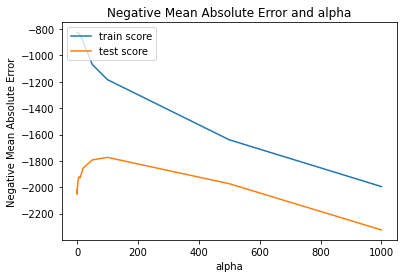

In [64]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [65]:
alpha =100

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train)

Lasso(alpha=100)

In [66]:
lasso.coef_

array([ 184.42970624,    0.        ,   -0.        , 1943.07701404,
        -43.85576808, 1716.71042609, 1117.12530703,   -0.        ,
         -0.        ,    0.        ,  735.19418255,  233.88791234,
          0.        ,   -0.        ,  -65.52642933,  238.12939538,
          0.        ,    0.        , -152.05303049,    0.        ,
        -77.74869798, -153.50567649,   40.18577495, 1268.66620432,
         -0.        ,   -0.        ,    0.        ,   -0.        ,
         -0.        ,   88.32022138,   -0.        , -214.76705586,
         -0.        ,  222.03262348,   -0.        ,   63.43428055,
         -0.        ,   -0.        ,   54.56649658,   -0.        ,
          0.        ,   -0.        ,   -0.        ,  295.43506432,
        120.67838309, 1913.94870816, 1241.64243687,    0.        ,
         -0.        ,   -0.        ,  155.31415767,  812.74243574,
          0.        ,   -0.        , -376.07751145,   -0.        ,
       -293.59856472,   -0.        ,  693.17322034, -179.96479

In [67]:
imp_lasso = pd.DataFrame({
    "Varname": X_train.columns,
    "Coefficient": lasso.coef_})
imp_lasso.sort_values(by="Coefficient", ascending=False)

,Varname,Coefficient
3,carwidth,1943.077014
45,CarName_bmw,1913.948708
5,curbweight,1716.710426
23,enginelocation_rear,1268.666204
46,CarName_buick,1241.642437
6,enginesize,1117.125307
51,CarName_jaguar,812.742436
10,horsepower,735.194183
58,CarName_porsche,693.173220
64,CarName_volvo,326.540041


In [68]:
imp_lasso =imp_lasso[imp_lasso['Coefficient'] !=0]
imp_lasso.sort_values(by="Coefficient", ascending=False)

,Varname,Coefficient
3,carwidth,1943.077014
45,CarName_bmw,1913.948708
5,curbweight,1716.710426
23,enginelocation_rear,1268.666204
46,CarName_buick,1241.642437
6,enginesize,1117.125307
51,CarName_jaguar,812.742436
10,horsepower,735.194183
58,CarName_porsche,693.173220
64,CarName_volvo,326.540041


In [69]:
y_pred = lasso.predict(X_test)

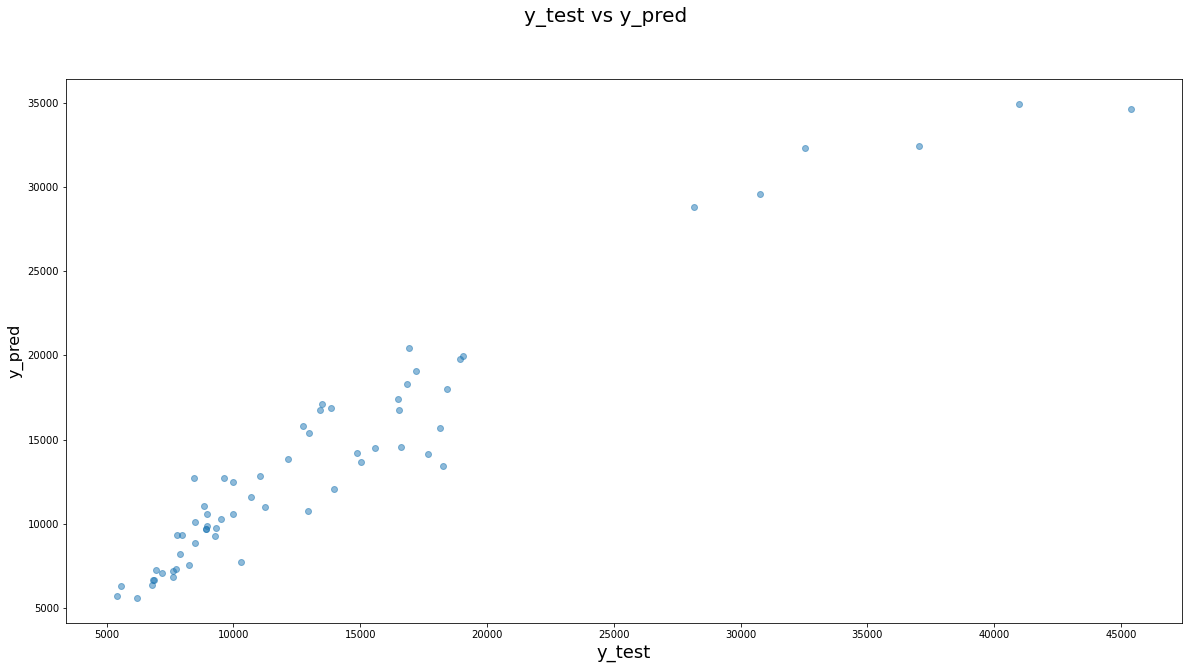

In [70]:
fig = plt.figure(figsize=(20,10))
plt.scatter(y_test, y_pred, alpha=.5)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16) 
plt.show()

In [71]:
df= pd.DataFrame({'Actual':y_test,'Predictions':y_pred})
df['Predictions']= round(df['Predictions'],2)
df.head()

,Actual,Predictions
160,7738,7317.02
186,8495,10105.58
59,8845,11053.77
165,9298,9736.99
140,7603,7188.51


In [72]:
from sklearn import metrics 

In [73]:
metrics.explained_variance_score(y_test,y_pred)

0.9151493063301723

In [74]:
metrics.mean_absolute_error(y_test,y_pred)

1686.45815442034

In [75]:
metrics.max_error(y_test,y_pred)

10734.473296788594

In [76]:
metrics.mean_squared_error(y_test,y_pred)

5948595.08874128

In [77]:
metrics.mean_squared_log_error(y_test,y_pred)

0.021558479641130633

In [78]:
metrics.median_absolute_error(y_test,y_pred)

1001.1482168084003

In [79]:
metrics.r2_score(y_test,y_pred)

0.9150553785462605

In [80]:
metrics.mean_poisson_deviance(y_test,y_pred)

313.01300887384014

In [81]:
metrics.mean_gamma_deviance(y_test,y_pred)

0.021183532256846764

In [82]:
metrics.mean_tweedie_deviance(y_test,y_pred)

5948595.08874128

#### Which variables are significant in predicting the price of a car?

    enginesize
    carwidth
    enginetype_rotor
    car_company_bmw
    enginelocation_rear
    car_company_renault (-vely)
    
These are the variables that are significant in predicting the price of a car.


*
- Concentration needs to be given to the doornumber, carbody, stroke and symboling as these feature if not properly handle could cost the company money in relation to competition among other car production company.